In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

from sklearn.decomposition import PCA

import seaborn as sn
from sklearn.metrics import confusion_matrix

Training data

In [17]:
train_data = pd.read_excel('b_train.xlsx')
print(train_data.shape)
train_data

(285, 9)


,Unnamed: 0,Time,Label,Ax,Ay,Az,Gx,Gy,Gz
0,0,0.000,STRAIGHT,0.0,-2.936689,0.0,0.0,0.000000,0.0
1,1,0.025,STRAIGHT,0.0,-2.352696,0.0,0.0,-1.427799,0.0
2,2,0.050,STRAIGHT,0.0,-1.124111,0.0,0.0,-5.410696,0.0
3,3,0.075,STRAIGHT,0.0,1.021853,0.0,0.0,-5.008076,0.0
4,4,0.100,STRAIGHT,0.0,0.379905,0.0,0.0,-3.566233,0.0
...,...,...,...,...,...,...,...,...,...
280,3116,7.625,BUMP,0.0,-12.428399,0.0,0.0,-82.455612,0.0
281,3117,7.650,BUMP,0.0,-12.632380,0.0,0.0,-100.537994,0.0
282,3118,7.675,BUMP,0.0,100.803314,0.0,0.0,-41.085541,0.0
283,3119,7.700,BUMP,0.0,9.274221,0.0,0.0,26.465513,0.0


In [18]:
train_data = train_data.drop(['Unnamed: 0'], axis = 1)
train_data = train_data.drop(['Time'], axis = 1)
train_data

,Label,Ax,Ay,Az,Gx,Gy,Gz
0,STRAIGHT,0.0,-2.936689,0.0,0.0,0.000000,0.0
1,STRAIGHT,0.0,-2.352696,0.0,0.0,-1.427799,0.0
2,STRAIGHT,0.0,-1.124111,0.0,0.0,-5.410696,0.0
3,STRAIGHT,0.0,1.021853,0.0,0.0,-5.008076,0.0
4,STRAIGHT,0.0,0.379905,0.0,0.0,-3.566233,0.0
...,...,...,...,...,...,...,...
280,BUMP,0.0,-12.428399,0.0,0.0,-82.455612,0.0
281,BUMP,0.0,-12.632380,0.0,0.0,-100.537994,0.0
282,BUMP,0.0,100.803314,0.0,0.0,-41.085541,0.0
283,BUMP,0.0,9.274221,0.0,0.0,26.465513,0.0


In [19]:
# distributing the dataset into two components X and Y
X = train_data.iloc[:, 1::].values
y = train_data.iloc[:, 0].values

splitting into train and cross validation data

In [20]:
# splitting the data into training and cross validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

test data

In [21]:
test_data = pd.read_excel('b_test.xlsx')
print(test_data.shape)
test_data

(104, 9)


,Unnamed: 0,Time,Label,Ax,Ay,Az,Gx,Gy,Gz
0,146,16.250,CRASH,1.115738,3.366795,3.225528,140.549881,-117.717888,-9.558323
1,147,16.275,CRASH,-171.360642,31.954634,-132.924942,-24.179520,14.161910,-34.545624
2,148,16.300,CRASH,-9.086907,12.807613,-6.879531,32.320045,19.837345,-2.285843
3,149,16.325,CRASH,2.863279,12.113437,0.846896,35.950722,16.928400,23.810099
4,150,16.350,CRASH,0.584189,12.534195,-0.355036,36.390232,16.307009,43.466026
...,...,...,...,...,...,...,...,...,...
99,866,7.750,BUMP,0.000000,-17.593439,0.000000,0.000000,-0.886302,0.000000
100,867,7.775,BUMP,0.000000,2.318068,0.000000,0.000000,-11.087134,0.000000
101,868,7.800,BUMP,0.000000,7.982172,0.000000,0.000000,-2.035196,0.000000
102,869,7.825,BUMP,0.000000,-0.269390,0.000000,0.000000,2.987059,0.000000


In [22]:
test_data = test_data.drop(['Unnamed: 0'], axis = 1)
test_data = test_data.drop(['Time'], axis = 1)
test_data

,Label,Ax,Ay,Az,Gx,Gy,Gz
0,CRASH,1.115738,3.366795,3.225528,140.549881,-117.717888,-9.558323
1,CRASH,-171.360642,31.954634,-132.924942,-24.179520,14.161910,-34.545624
2,CRASH,-9.086907,12.807613,-6.879531,32.320045,19.837345,-2.285843
3,CRASH,2.863279,12.113437,0.846896,35.950722,16.928400,23.810099
4,CRASH,0.584189,12.534195,-0.355036,36.390232,16.307009,43.466026
...,...,...,...,...,...,...,...
99,BUMP,0.000000,-17.593439,0.000000,0.000000,-0.886302,0.000000
100,BUMP,0.000000,2.318068,0.000000,0.000000,-11.087134,0.000000
101,BUMP,0.000000,7.982172,0.000000,0.000000,-2.035196,0.000000
102,BUMP,0.000000,-0.269390,0.000000,0.000000,2.987059,0.000000


In [23]:
# distributing the dataset into two components X and Y
X_testfile = test_data.iloc[:, 1::].values
y_testfile = test_data.iloc[:, 0].values

KNN + PCA for multiple components

In [25]:
def pcaKNN_k(k,neigh,Xtrain,ytrain,Xtest,ytest):
    # PCA - dimensionality reduction
    pca = PCA(n_components=k)
    xtrain_new = pca.fit_transform(Xtrain)
    xtest_new = pca.transform(Xtest)
    # KNN
    model = KNeighborsClassifier(n_neighbors=neigh)
    model.fit(xtrain_new,ytrain)
    return model.score(xtest_new,ytest) 

In [26]:
def pcaKNN(k,neighbour,Xtrain,ytrain,Xtest,ytest):
    scores = np.zeros(k.shape[0])
    n = k.shape[0]
    for i in range(n):
         scores[i] = pcaKNN_k(k[i],neighbour,Xtrain,ytrain,Xtest,ytest)
    return scores

Scores for different number of neighbours - cross validation

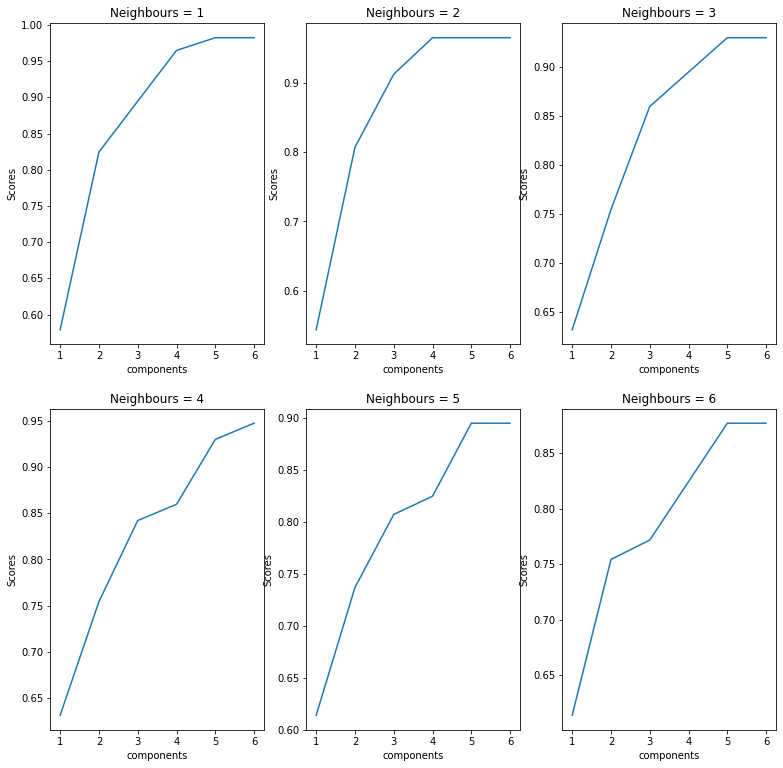

In [27]:
neighbours = np.arange(1,7)
fig = plt.figure(figsize = (13,13))
num_comps = np.arange(1,7)
for i in neighbours:
  scores = pcaKNN(num_comps,i,Xtrain=X_train,Xtest=X_test,ytrain=y_train,ytest=y_test)
  fig.add_subplot(2,3,i)
  plt.plot(num_comps,scores)
  plt.xlabel("components")
  plt.ylabel("Scores")
  plt.title('Neighbours = '+str(i))

Scores for different number of neighbours - test file

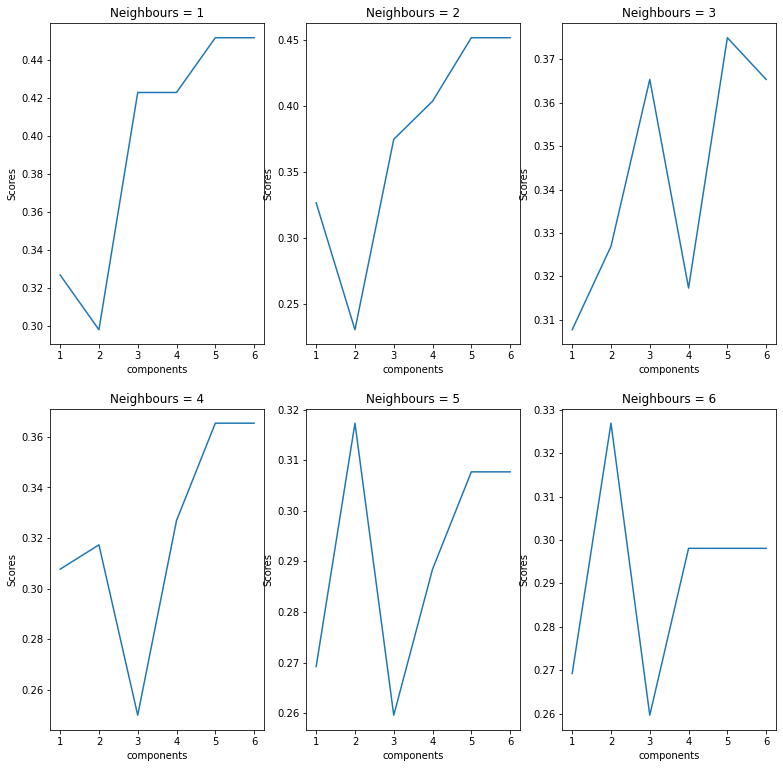

In [28]:
neighbours = np.arange(1,7)
fig = plt.figure(figsize = (13,13))
num_comps = np.arange(1,7)
for i in neighbours:
  scores = pcaKNN(num_comps,i,Xtrain=X_train,Xtest=X_testfile,ytrain=y_train,ytest=y_testfile)
  fig.add_subplot(2,3,i)
  plt.plot(num_comps,scores)
  plt.xlabel("components")
  plt.ylabel("Scores")
  plt.title('Neighbours = '+str(i))

confusion matrix

In [24]:
model =KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9298245614035088

Text(69.0, 0.5, 'Truth')

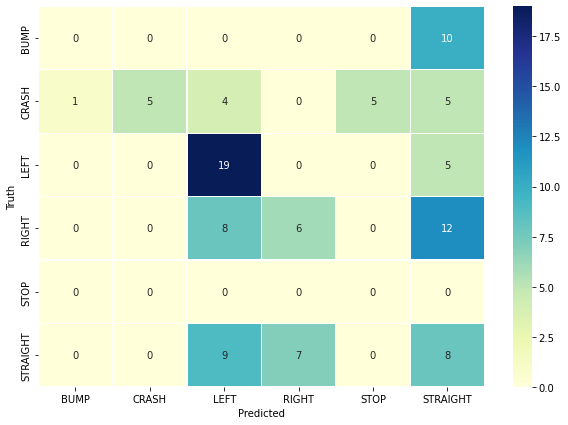

In [31]:
y_predicted = model.predict(X_testfile)
plt.figure(figsize=(10, 7))
class_labels = [ 'BUMP', 'CRASH', 'LEFT','RIGHT',  'STOP', 'STRAIGHT']
cm = confusion_matrix(y_testfile, y_predicted)
sn.heatmap(cm,  xticklabels = class_labels, yticklabels = class_labels, annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Truth')